In [26]:
# we load the needed libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
# we ignore deprecation warnings and futurewarnings for cleaner output
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Exercise 4.1

* Prepare a separate dataframe including close prices of two selected assets
* fill missing values with the last non-missing observation
* Assume you are excluding the first and last 10 minutes of the session (9:31-9:40 and 15:51-16:00) - delete the data for this period (place NAs in the data)

In [27]:
data_url = "http://coin.wne.uw.edu.pl/pwojcik/hfd/US_stocks.csv"

dataUSA = pd.read_csv(data_url, 
                      # try to parse column "timestamp" as dates/datetimes
                      parse_dates = ["timestamp"], 
                      # use column "timestamp" as dataframe index
                      index_col = "timestamp")

dataUSA.head()

,open_AAPL,high_AAPL,low_AAPL,close_AAPL,volume_AAPL,open_META,high_META,low_META,close_META,volume_META,...,open_MA,high_MA,low_MA,close_MA,volume_MA,open_V,high_V,low_V,close_V,volume_V
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-01-02 09:31:00,248.3506,248.4105,247.4327,247.6023,1245220,588.7706,591.9455,588.1616,591.9156,209802.0,...,526.1993,526.1993,523.6041,524.7426,48309.0,316.7216,316.9708,316.1435,316.8013,122361.0
2025-01-02 09:32:00,247.6672,248.5202,246.7044,247.0636,463134,591.7708,591.9905,589.9987,591.6660,36859.0,...,525.0856,525.1453,523.6538,523.6538,7293.0,316.9658,317.0405,316.0440,316.4724,17787.0
2025-01-02 09:33:00,246.9938,247.8218,246.6595,246.6845,219248,591.8657,592.5845,591.1892,592.0054,47969.0,...,524.1311,524.5686,523.2262,524.1012,8385.0,316.0439,316.4724,315.7748,316.1336,22212.0
2025-01-02 09:34:00,246.6546,246.7581,245.7966,246.2006,399303,591.9455,591.9455,589.5294,589.5491,53483.0,...,524.1112,524.1510,523.5693,523.8328,10321.0,316.1236,316.3827,315.8346,315.9542,14137.0
2025-01-02 09:35:00,246.1757,246.3652,245.7267,245.7567,289896,589.7690,590.2483,588.8207,588.9803,31812.0,...,523.8328,524.8371,523.8228,523.8974,10893.0,315.9442,316.9708,315.9442,316.5821,33400.0


In [28]:
# Let's create an object containing only closing prices
# (columns starting with "close_")
dataUSA_close = dataUSA.filter(like = "close_").copy()

# fill missing close prices with the last non-missing value
dataUSA_close.ffill(inplace = True)

dataUSA_KO_PEP = dataUSA_close[['close_KO', 'close_PEP']].copy()

dataUSA_KO_PEP.head()

,close_KO,close_PEP
timestamp,,
2025-01-02 09:31:00,61.6987,150.0814
2025-01-02 09:32:00,61.6198,149.8123
2025-01-02 09:33:00,61.6297,149.8123
2025-01-02 09:34:00,61.6100,149.9006
2025-01-02 09:35:00,61.6642,149.9251


In [29]:
dataUSA_KO_PEP.loc[dataUSA_KO_PEP.between_time("09:31", "09:40").index] = np.nan
dataUSA_KO_PEP.loc[dataUSA_KO_PEP.between_time("15:51", "16:00").index] = np.nan

In [30]:
dataUSA_KO_PEP.head(20)

,close_KO,close_PEP
timestamp,,
2025-01-02 09:31:00,NaN,NaN
2025-01-02 09:32:00,NaN,NaN
2025-01-02 09:33:00,NaN,NaN
2025-01-02 09:34:00,NaN,NaN
2025-01-02 09:35:00,NaN,NaN
2025-01-02 09:36:00,NaN,NaN
2025-01-02 09:37:00,NaN,NaN
2025-01-02 09:38:00,NaN,NaN
2025-01-02 09:39:00,NaN,NaN


# Exercise 4.2

Prepare a strategy framework based on the intersection of price and a single moving average (SMA or EMA).

* Choose your own parameters.
* Plot the results of your calculations on a chart (for the first 5 days).

In [31]:
dataUSA_KO_PEP['close_KO_SMA20'] = dataUSA_KO_PEP['close_KO'].rolling(window = 20, min_periods = 10).mean()                                                                          

In [32]:
dataUSA_KO_PEP['close_KO_SMA20'] = dataUSA_KO_PEP['close_KO_SMA20'].where(
    ~dataUSA_KO_PEP['close_KO'].isna(), np.nan)

In [33]:
dataUSA_KO_PEP['close_KO_EMA20'] = dataUSA_KO_PEP['close_KO'].ewm(span = 20, min_periods = 10).mean()

dataUSA_KO_PEP['close_KO_EMA20'] = dataUSA_KO_PEP['close_KO_EMA20'].where(
    ~dataUSA_KO_PEP['close_KO'].isna(), np.nan)
                                                                            


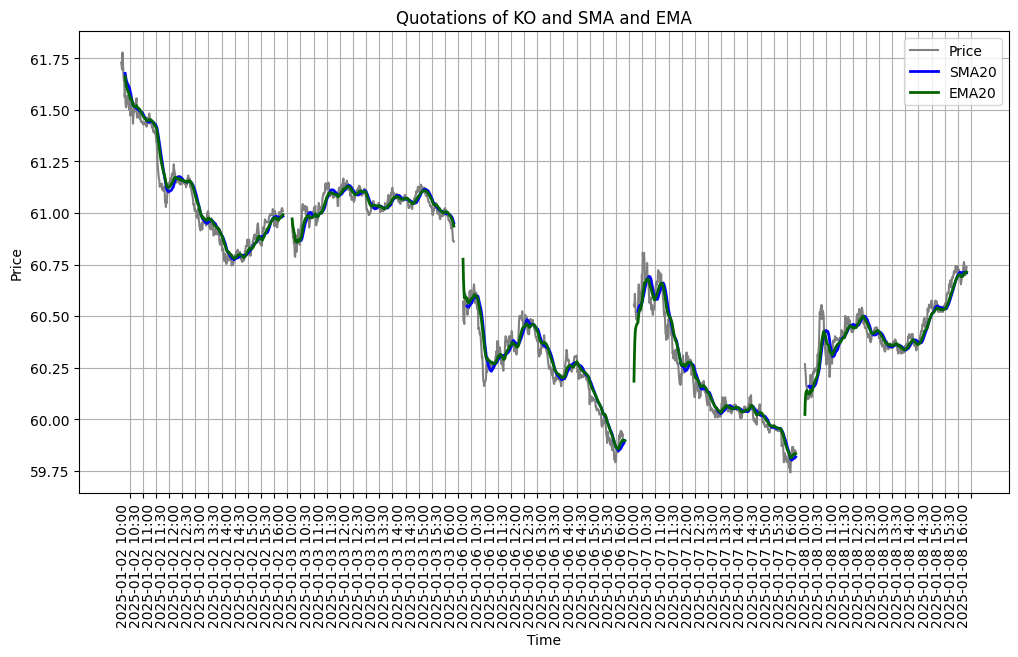

In [34]:
dataUSA_KO_PEP_plot = dataUSA_KO_PEP[['close_KO',
                                            'close_KO_SMA20',
                                            'close_KO_EMA20']].copy()
# Filter only the first few days
end_date = dataUSA_KO_PEP_plot.index.min() + pd.Timedelta(days = 7)
dataUSA_KO_PEP_plot = dataUSA_KO_PEP_plot.loc[:end_date]

# Add a time column (index as datetime)
dataUSA_KO_PEP_plot['time'] = dataUSA_KO_PEP_plot.index

# Reset the index so that 'time' is a column
dataUSA_KO_PEP_plot = dataUSA_KO_PEP_plot.reset_index(drop=True)

# We make a plot by observation number – so that there are no gaps between sessions
plt.figure(figsize = (12, 6))
plt.plot(dataUSA_KO_PEP_plot.index, 
         dataUSA_KO_PEP_plot['close_KO'], 
         label = 'Price', 
         color='gray')
plt.plot(dataUSA_KO_PEP_plot.index, 
         dataUSA_KO_PEP_plot['close_KO_SMA20'], 
         label = 'SMA20', 
         color = 'blue',  
         linewidth = 2)
plt.plot(dataUSA_KO_PEP_plot.index, 
         dataUSA_KO_PEP_plot['close_KO_EMA20'], 
         label = 'EMA20', 
         color = 'darkgreen',  
         linewidth = 2)

# mark on the X axis ticks with dates/times every half hour
tick_mask = dataUSA_KO_PEP_plot['time'].dt.minute % 30 == 0
xticks = dataUSA_KO_PEP_plot.index[tick_mask]
xticklabels = dataUSA_KO_PEP_plot['time'][tick_mask].dt.strftime('%Y-%m-%d %H:%M')
plt.xticks(ticks = xticks, labels = xticklabels, rotation = 90, ha = 'right')

plt.title("Quotations of KO and SMA and EMA")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# Exercise 4.3

Prepare a strategy framework based on the intersection of two moving **medians**.

* Choose your own parameters.
* Plot the calculation results on a chart (for the first 5 days).

In [35]:
dataUSA_KO_PEP['close_KO_Median20'] = dataUSA_KO_PEP['close_KO'].rolling(window = 20, min_periods = 10).median() 

In [36]:
dataUSA_KO_PEP['close_KO_Median20'] = dataUSA_KO_PEP['close_KO_Median20'].where(
    ~dataUSA_KO_PEP['close_KO'].isna(), np.nan)

In [37]:
dataUSA_KO_PEP['close_KO_Median40'] = dataUSA_KO_PEP['close_KO'].rolling(window = 40, min_periods = 20).median() 

In [38]:
dataUSA_KO_PEP['close_KO_Median40'] = dataUSA_KO_PEP['close_KO_Median40'].where(
    ~dataUSA_KO_PEP['close_KO'].isna(), np.nan)

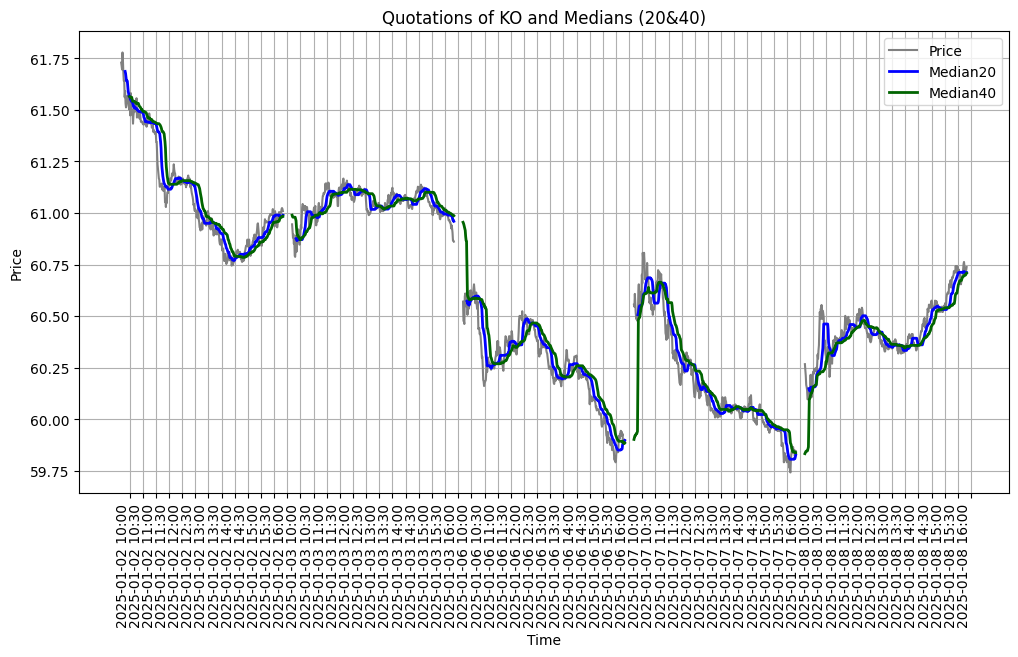

In [39]:
dataUSA_KO_PEP_plot = dataUSA_KO_PEP[['close_KO',
                                            'close_KO_Median20',
                                            'close_KO_Median40']].copy()
# Filter only the first few days
end_date = dataUSA_KO_PEP_plot.index.min() + pd.Timedelta(days = 7)
dataUSA_KO_PEP_plot = dataUSA_KO_PEP_plot.loc[:end_date]

# Add a time column (index as datetime)
dataUSA_KO_PEP_plot['time'] = dataUSA_KO_PEP_plot.index

# Reset the index so that 'time' is a column
dataUSA_KO_PEP_plot = dataUSA_KO_PEP_plot.reset_index(drop=True)

# We make a plot by observation number – so that there are no gaps between sessions
plt.figure(figsize = (12, 6))
plt.plot(dataUSA_KO_PEP_plot.index, 
         dataUSA_KO_PEP_plot['close_KO'], 
         label = 'Price', 
         color='gray')
plt.plot(dataUSA_KO_PEP_plot.index, 
         dataUSA_KO_PEP_plot['close_KO_Median20'], 
         label = 'Median20', 
         color = 'blue',  
         linewidth = 2)
plt.plot(dataUSA_KO_PEP_plot.index, 
         dataUSA_KO_PEP_plot['close_KO_Median40'], 
         label = 'Median40', 
         color = 'darkgreen',  
         linewidth = 2)

# mark on the X axis ticks with dates/times every half hour
tick_mask = dataUSA_KO_PEP_plot['time'].dt.minute % 30 == 0
xticks = dataUSA_KO_PEP_plot.index[tick_mask]
xticklabels = dataUSA_KO_PEP_plot['time'][tick_mask].dt.strftime('%Y-%m-%d %H:%M')
plt.xticks(ticks = xticks, labels = xticklabels, rotation = 90, ha = 'right')

plt.title("Quotations of KO and Medians (20&40)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# Exercise 4.4

Prepare a strategy framework based on a volatility breakout model

* Choose a volatility measure other than standard deviation and your own parameter values
* Plot the calculation results on a chart (for the first 5 days).

In [ ]:
    dataUSA_KO_PEP['close_KO_MedAD20'] = dataUSA_KO_PEP['close_KO'].rolling(window = 20,
                                                                                    min_periods =10).apply(
        lambda x: np.median(np.abs(x - np.median(x))), raw = True)

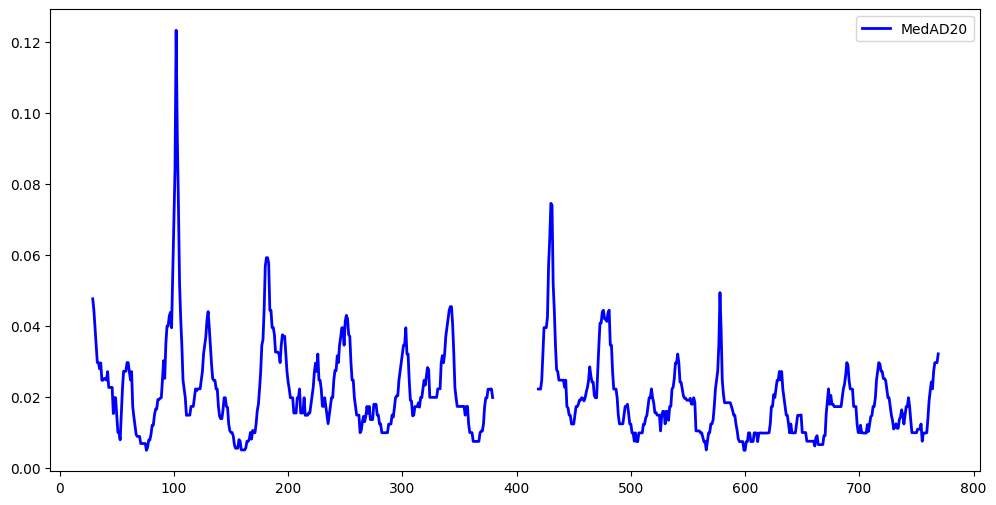

In [46]:
# Let's compare three alternative measures of volatility on a chart

# Select only the columns needed for the chart
dataUSA_KO_PEP_plot = dataUSA_KO_PEP[['close_KO_MedAD20']].copy()

# Filter only the first 3 days
end_date = dataUSA_KO_PEP_plot.index.min() + pd.Timedelta(days = 2)
dataUSA_KO_PEP_plot = dataUSA_KO_PEP_plot.loc[:end_date]
# Add a time column (index as datetime)
dataUSA_KO_PEP_plot['time'] = dataUSA_KO_PEP_plot.index
# Reset the index so that 'time' is a column
dataUSA_KO_PEP_plot = dataUSA_KO_PEP_plot.reset_index(drop=True)

# We make a plot by observation number – so that there are no gaps between sessions
plt.figure(figsize = (12, 6))   
plt.plot(dataUSA_KO_PEP_plot.index, 
         dataUSA_KO_PEP_plot['close_KO_MedAD20'], 
         label = 'MedAD20', 
         color = 'blue',  
         linewidth = 2)


# Let's add a legend
plt.legend()

# similar volatility patterns, but alternative measures
# can be used as one of the strategy parameters

In [47]:
dataUSA_KO_PEP.to_parquet("dataUSA_KO_PEP_after_HW5.parquet")